In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('data/Bank.csv')

In [3]:
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
x=data.iloc[:,:7].values
y=data.iloc[:,7].values
print(x.shape,y.shape)

(41188, 7) (41188,)


In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)


In [6]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(32950, 7) (32950,)
(8238, 7) (8238,)


In [7]:
model = LogisticRegression()

In [8]:
model.fit(train_x,train_y)

C:\Users\hrmwe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
model.coef_

array([[-9.48312600e-05,  4.54723939e-03, -2.11571106e-01,
         4.33138445e-01,  5.44887871e-02, -2.75201520e-01,
        -8.02727466e-03]])

In [11]:
model.intercept_

array([0.00394429])

In [13]:
test_y_pred=model.predict(test_x)
test_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
cm=confusion_matrix(test_y,test_y_pred)
cm

array([[7131,  170],
       [ 606,  331]], dtype=int64)

In [16]:
mce=(cm[0][1]+cm[1][0])/np.sum(cm[0])
mce

0.10628681002602383

In [17]:
acc=1-mce
acc

0.8937131899739762

<Axes: >

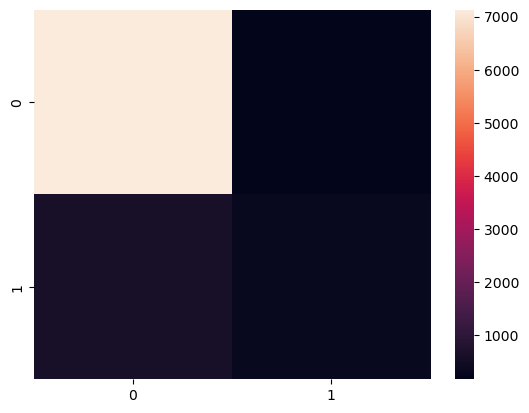

In [18]:
hm = sns.heatmap(cm)
hm

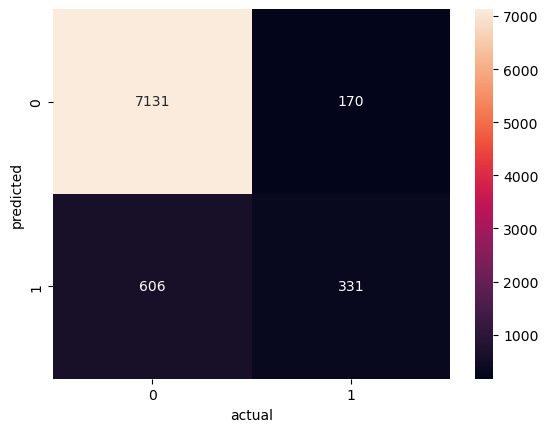

In [19]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [20]:
print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7301
           1       0.66      0.35      0.46       937

    accuracy                           0.91      8238
   macro avg       0.79      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



In [21]:
cm

array([[7131,  170],
       [ 606,  331]], dtype=int64)

In [22]:
acc = (331 + 7136) / (7136 + 165 + 606 + 331)
acc

0.906409322651129

In [23]:
accuracy_score(test_y, test_y_pred)

0.9058023792182569

In [24]:
mce = (165 + 606) / (7136 + 165 + 606 + 331)
mce

0.09359067734887108

In [25]:
model.predict([[28, 339, -1.7, 94.055, -39.8, 0.729, 4991.6]])[0]

1